<a href="https://colab.research.google.com/github/melvin-02/Handwritten-EqSolver/blob/master/Numbers_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip -q '/content/drive/My Drive/Colab Notebooks/Math/numbers.zip' 

In [ ]:
import numpy as np
import tensorflow as tf
import cv2
import os
from glob import glob
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
folder_path = "/content/data/extracted_images"
files = glob(folder_path + '/*/*.jpg')
print(len(files))

47827


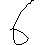

In [ ]:
# randomly see any image
img = cv2.imread(files[4001])
cv2_imshow(img)


In [ ]:
# build the CNN architecture for the model
i = Input(shape=(32,32,1))
x = Conv2D(32, (3,3), padding='same', activation='relu')(i)
x = MaxPool2D((2,2))(x)
x = Conv2D(32, (3,3), padding='same', activation='relu')(x)
x = MaxPool2D((2,2))(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(14, activation='softmax')(x)

model = Model(i,x)

In [ ]:
gen = ImageDataGenerator(rescale=1/255.0)

In [ ]:

train_gen = gen.flow_from_directory(folder_path,
                                    target_size = (32,32),
                                    color_mode = 'grayscale',
                                    class_mode = 'categorical',
                                    batch_size= 64,
                                    shuffle=True)

Found 47827 images belonging to 14 classes.


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

r = model.fit_generator(train_gen,
                        steps_per_epoch = len(train_gen.filenames)//64,
                        epochs = 10,
                        )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
747/747 [==============================] - 12s 16ms/step - loss: 0.4981 - accuracy: 0.8470
Epoch 2/10
747/747 [==============================] - 12s 16ms/step - loss: 0.1278 - accuracy: 0.9615
Epoch 3/10
747/747 [==============================] - 12s 16ms/step - loss: 0.0794 - accuracy: 0.9759
Epoch 4/10
747/747 [==============================] - 12s 16ms/step - loss: 0.0603 - accuracy: 0.9825
Epoch 5/10
747/747 [==============================] - 12s 16ms/step - loss: 0.0466 - accuracy: 0.9862
Epoch 6/10
747/747 [==============================] - 12s 16ms/step - loss: 0.0415 - accuracy: 0.9877
Epoch 7/10
747/747 [==============================] - 12s 16ms/step - loss: 0.0344 - accuracy: 0.9894
Epoch 8/10
747/747 [==============================] - 12s 16ms/step - loss: 0.0334 - accuracy: 0.9899
Epoch 9/10
747/747 [==============================] - 12s 15ms/step - loss: 0.0299 - accuracy: 0.9909
Epoch 

In [ ]:
model.save("num_detect99.h5")

In [ ]:
train_gen.class_indices

{'+': 0,
 '-': 1,
 '0': 2,
 '1': 3,
 '2': 4,
 '3': 5,
 '4': 6,
 '5': 7,
 '6': 8,
 '7': 9,
 '8': 10,
 '9': 11,
 'forward_slash': 12,
 'times': 13}